In [48]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [50]:
!python -m spacy download en_core_web_md

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063



  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.8.0/en_core_web_md-3.8.0-py3-none-any.whl (33.5 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [51]:
!pip install wordcloud

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [52]:
!pip install nltk

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [53]:
!pip show spacy

Name: spacy
Version: 3.8.3
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: C:\Users\91805\anaconda3\Lib\site-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: 


In [54]:
pip install textract

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [105]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [106]:
os.listdir('Resumes/')

['Peoplesoft resumes',
 'React JS Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

# Exctract the Text from Dataset

In [107]:
# try to extract all folder one time
import os

file_name = []
category = []
base_dir = './Resumes'
for root, dirs, files in os.walk(base_dir, topdown=False):
    for name in files:
        if name.endswith(".docx"):
            file_path = os.path.join(root, name)
            file_name.append(file_path)

In [108]:
import os
from docx import Document
import win32com.client

def extract_doc(file_path):
    """Extract text from a .doc file using pywin32."""
    word = win32com.client.Dispatch("Word.Application")
    doc = word.Documents.Open(file_path)
    text = doc.Content.Text
    doc.Close()
    word.Quit()
    return text

In [109]:

def extract_docx(file_path):
    """Extract text from a .docx file using python-docx."""
    doc = Document(file_path)
    return '\n'.join([p.text for p in doc.paragraphs])

In [110]:
# Initialize variables
file_path1 = []
category1 = []
directory1 = r"C:\Users\91805\Downloads\Data science\Resume classification dataset\Resume classification dataset\Dataset\Resumes\Peoplesoft resumes"

for file_name in os.listdir(directory1):
    full_path = os.path.join(directory1, file_name)
    try:
        if file_name.endswith('.docx'):
            # Process .docx files
            text_content = extract_docx(full_path)
        elif file_name.endswith('.doc'):
            # Process .doc files
            text_content = extract_doc(full_path)
        else:
            continue

        file_path1.append(text_content)
        category1.append('Peoplesoft')
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(f"Processed {len(file_path1)} files successfully.")

Processed 20 files successfully.


In [111]:
os.listdir('C:/Users/91805/Downloads/Data science/Resume classification dataset/Resume classification dataset/Dataset/Resumes/')


['Peoplesoft resumes',
 'React JS Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

In [112]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft
2,PeopleSoft Database Administrator\r ...,Peoplesoft
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft
5,\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...,Peoplesoft
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft
7,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...,Peoplesoft
8,Vinod Akkala ...,Peoplesoft
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft


In [113]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [114]:
import os
from PyPDF2 import PdfReader

def extract_pdf(file_path):
    """Extract text content from a PDF file."""
    text_content = ""
    try:
        reader = PdfReader(file_path)
        for page in reader.pages:
            text_content += page.extract_text()
        return text_content
    except Exception as e:
        raise Exception(f"Failed to extract text from PDF: {e}")

In [115]:
# file_path2 = []
# category2  = []
# directory2 = 'Resumes/React JS Developer/'
# for i in os.listdir(directory2):
#     if i.endswith(('.docx','.pdf')):
#         os.path.join(directory2, i)
#         file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
#         category2.append('React JS Developer')

# import os
# import textract

# file_path2 = []
# category2 = []
# directory2 = 'Resumes/React JS Developer/'

# # Ensure directory exists
# if not os.path.exists(directory2):
#     print("Directory does not exist:", directory2)
# else:
#     for i in os.listdir(directory2):
#         if i.endswith(('.docx', '.pdf')):
#             file_path = os.path.join(directory2, i)
#             try:
#                 # Extract text and add category
#                 text = textract.process(file_path).decode('utf-8')
#                 file_path2.append(text)
#                 category2.append('React JS Developer')
#             except Exception as e:
#                 print(f"Error processing file: {file_path}\n{e}")


# Initialize variables
file_path2 = []
category2 = []
directory2 = r"C:\Users\91805\Downloads\Data science\Resume classification dataset\Resume classification dataset\Dataset\Resumes\React JS Developer"

for file_name in os.listdir(directory2):
    full_path = os.path.join(directory2, file_name)
    try:
        if file_name.endswith('.docx'):
            # Process .docx files
            text_content = extract_docx(full_path)
        elif file_name.endswith('.doc'):
            # Process .doc files
            text_content = extract_doc(full_path)
        elif file_name.endswith('.pdf'):
            text_content = extract_pdf(full_path)
        else:
            continue

        file_path2.append(text_content)
        category2.append('React JS Developer')
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(f"Processed {len(file_path2)} files successfully.")


Processed 24 files successfully.


In [116]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n ...,React JS Developer
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS Developer
3,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer
5,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer
6,\r\r PROFILE\rSearching for the opportunity ...,React JS Developer
7,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React JS Developer
8,"\n\n 204,Sri geethika prestige,road number 10...",React JS Developer
9,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React JS Developer


In [117]:
# file_path3 = []
# category3  = []
# directory3 = 'Resumes/SQL Developer Lightning insight/'
# for i in os.listdir(directory3):
#     if i.endswith('.docx'):
#         os.path.join(directory3, i)
#         file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
#         category3.append('SQL Developer')

# Initialize variables
file_path3 = []
category3 = []
directory3 = r"C:\Users\91805\Downloads\Data science\Resume classification dataset\Resume classification dataset\Dataset\Resumes\SQL Developer Lightning insight"

for file_name in os.listdir(directory3):
    full_path = os.path.join(directory3, file_name)
    try:
        if file_name.endswith('.docx'):
            # Process .docx files
            text_content = extract_docx(full_path)
        elif file_name.endswith('.doc'):
            # Process .doc files
            text_content = extract_doc(full_path)
        else:
            continue

        file_path3.append(text_content)
        category3.append('SQL Developer Lightning insight')
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(f"Processed {len(file_path3)} files successfully.")

Processed 14 files successfully.


In [118]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,SQL Developer Lightning insight
1,\nAradhana Tripathi\n\nCurrent Location: Gachi...,SQL Developer Lightning insight
2,BUDDHA VAMSI ...,SQL Developer Lightning insight
3,KAMBALLA PRADEEP ...,SQL Developer Lightning insight
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer Lightning insight
5,\n Res...,SQL Developer Lightning insight
6,SQL DEVELOPER\nName: - Bandi prem sai\n\n\nW...,SQL Developer Lightning insight
7,SQL SER...,SQL Developer Lightning insight
8,SQL SER...,SQL Developer Lightning insight
9,RAJU PAVANA KUMARI\n\n\nProfessional Summary:...,SQL Developer Lightning insight


In [119]:
# file_path4 = []
# category4  = []
# directory4 = 'Resumes/workday resumes/'
# for i in os.listdir(directory4):
#     if i.endswith('.docx'):
#         os.path.join(directory4, i)
#         file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
#         category4.append('Workday')

file_path4 = []
category4 = []
directory4 = r"C:\Users\91805\Downloads\Data science\Resume classification dataset\Resume classification dataset\Dataset\Resumes\workday resumes"

for file_name in os.listdir(directory4):
    full_path = os.path.join(directory4, file_name)
    try:
        if file_name.endswith('.docx'):
            # Process .docx files
            text_content = extract_docx(full_path)
        elif file_name.endswith('.doc'):
            # Process .doc files
            text_content = extract_doc(full_path)
        else:
            continue

        file_path4.append(text_content)
        category4.append('workday resumes')
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(f"Processed {len(file_path4)} files successfully.")

Processed 21 files successfully.


In [120]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday resumes
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,workday resumes
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,workday resumes
3,Harikrishna Akula ...,workday resumes
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,workday resumes
5,\n ...,workday resumes
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,workday resumes
7,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,workday resumes
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,workday resumes
9,\n\nMooraboyina Guravaiah\nWorkday Integration...,workday resumes


In [121]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft,NaN,NaN,NaN
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\r ...,Peoplesoft,NaN,NaN,NaN
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,NaN,NaN,NaN
...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,NaN,NaN,NaN,workday resumes
75,Seeking suitable positions in Workday HCM as ...,NaN,NaN,NaN,workday resumes
76,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,NaN,NaN,NaN,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,workday resumes


In [122]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


# About Dataset

In [123]:
file_path   = r'Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [124]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [125]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


# type of file format

In [126]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

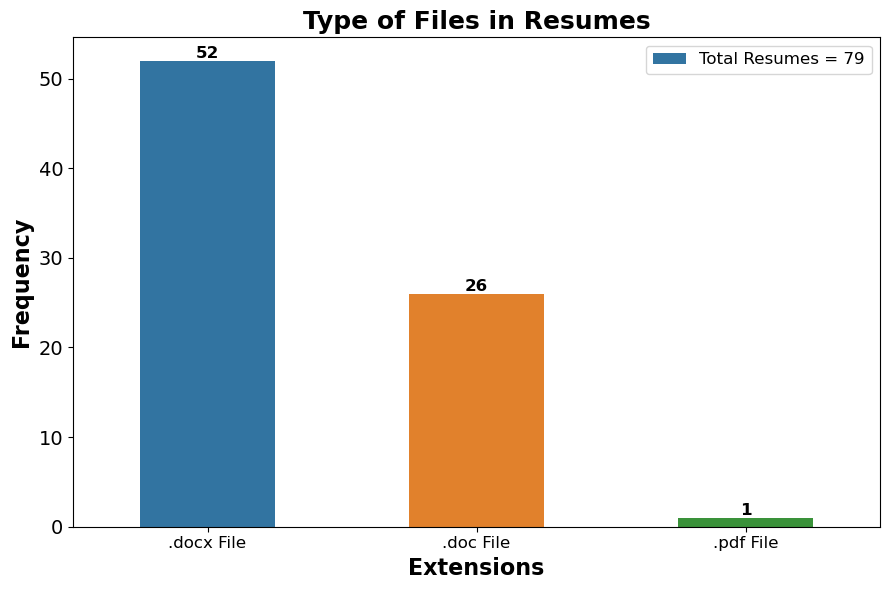

In [127]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

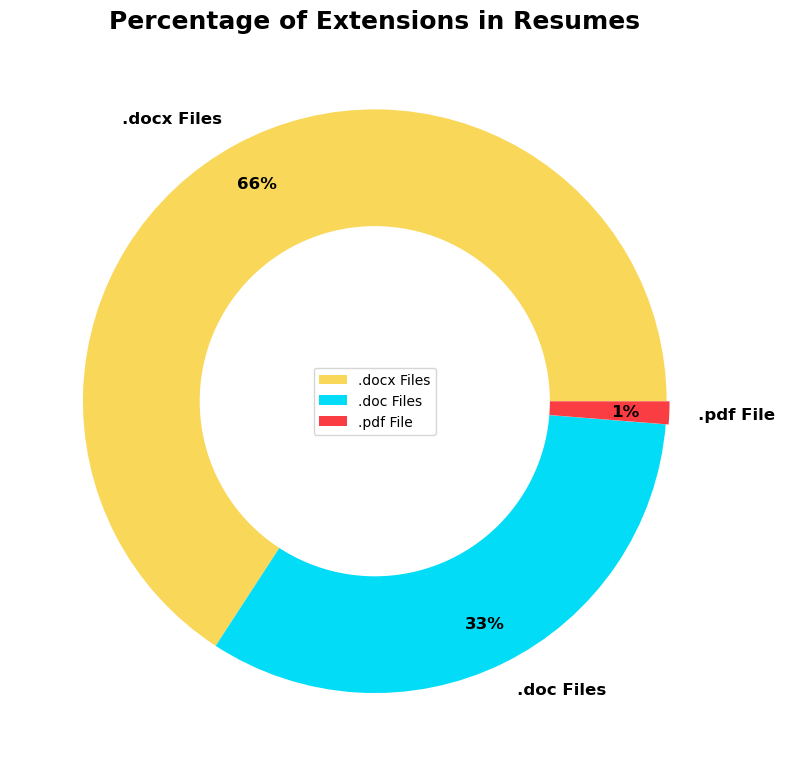

In [128]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

# Merge all Unnecessary column in One Column

In [129]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
2,PeopleSoft Database Administrator\r ...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,NaN,NaN,NaN,Peoplesoft
...,...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,NaN,NaN,NaN,workday resumes,workday resumes
75,Seeking suitable positions in Workday HCM as ...,NaN,NaN,NaN,workday resumes,workday resumes
76,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,NaN,NaN,NaN,workday resumes,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,workday resumes,workday resumes


In [130]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [131]:
# Final dataset
resume_data

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n To work in a gl...
1,Peoplesoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,Peoplesoft,PeopleSoft Database Administrator\r ...
3,Peoplesoft,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,workday resumes,\tWorkday Integration Consultant\r\rName ...
75,workday resumes,Seeking suitable positions in Workday HCM as ...
76,workday resumes,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77,workday resumes,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [132]:
resume_data["Raw_Details"][4]

'Priyanka Ramadoss\r61/46, MountPleasant, \rCoonoor\rThe Nilgiris- 643102                                                                                            \r\rCareer Objective\r\rTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\r\rProfile Summary\r\rAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\r\rProfessional Summary\r\rPeopleSoft Administrator (September 2016-Present)\r\rExperience in PeopleSoft Administration for Finance application.\rProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\rActive monitoring in Non production databases and applications.\rKnowledgeable on PeopleSoft migrations using application designer, data mover and taking compare reports 

# Save new CSV File

In [133]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [134]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n To work in a gl...
1,Peoplesoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,Peoplesoft,PeopleSoft Database Administrator\r ...
3,Peoplesoft,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,workday resumes,\tWorkday Integration Consultant\r\rName ...
75,workday resumes,Seeking suitable positions in Workday HCM as ...
76,workday resumes,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77,workday resumes,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [135]:
resume_data[resume_data.Category == 'workday resumes']

,Category,Raw_Details
58,workday resumes,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...
59,workday resumes,\t\n\n\nName : Gopi Krishna Reddy\n\t\...
60,workday resumes,Hari Krishna M\r\r\rSummary:\rA result oriente...
61,workday resumes,Harikrishna Akula ...
62,workday resumes,HIMA.MENDU\r \r\rCareer Objective\rTo continu...
63,workday resumes,\n ...
64,workday resumes,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...
65,workday resumes,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...
66,workday resumes,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...
67,workday resumes,\n\nMooraboyina Guravaiah\nWorkday Integration...


In [136]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

# Number of Words in each Resume

In [137]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,978
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431
2,PeopleSoft Database Administrator\r ...,1346
3,Murali\n\nExperience Summary \n\nI have 6 year...,494
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670


# Number of Characters

In [138]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,7256
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,8047
2,PeopleSoft Database Administrator\r ...,6768
3,Murali\n\nExperience Summary \n\nI have 6 year...,3981
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",5076


# Number of Stopwords

In [139]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')

# Load English stopwords
stop = stopwords.words('english')

# Calculate the number of stopwords in the 'Raw_Details' column
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(
    lambda x: len([word for word in x.split() if word in stop])
)

# Display the first few rows with Raw_Details and Stopwords
print(resume_data[['Raw_Details', 'Stopwords']].head())


                                         Raw_Details  Stopwords
0    Anubhav Kumar Singh\t\t\n\n  To work in a gl...        187
1  \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...        186
2  PeopleSoft Database Administrator\r           ...        177
3  Murali\n\nExperience Summary \n\nI have 6 year...        111
4  Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...        123


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 # Number of Numerics

In [140]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,3
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,6
2,PeopleSoft Database Administrator\r ...,4
3,Murali\n\nExperience Summary \n\nI have 6 year...,1
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",5


In [141]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n To work in a gl...,978,7256,187,3
1,Peoplesoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431,8047,186,6
2,Peoplesoft,PeopleSoft Database Administrator\r ...,1346,6768,177,4
3,Peoplesoft,Murali\n\nExperience Summary \n\nI have 6 year...,494,3981,111,1
4,Peoplesoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670,5076,123,5
...,...,...,...,...,...,...
74,workday resumes,\tWorkday Integration Consultant\r\rName ...,904,6967,197,3
75,workday resumes,Seeking suitable positions in Workday HCM as ...,990,6324,191,6
76,workday resumes,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,979,7309,228,1
77,workday resumes,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1027,6627,193,7


# Text Pre-Processing

# using Regular Expression

In [142]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [143]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# Clean Text from Resume

In [144]:
resume_data

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n To work in a gl...,anubhav kumar singh work globally competitive ...
1,Peoplesoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,profile summary years experience implementing ...
2,Peoplesoft,PeopleSoft Database Administrator\r ...,peoplesoft database administrator gangareddy p...
3,Peoplesoft,Murali\n\nExperience Summary \n\nI have 6 year...,murali experience summary years experience wor...
4,Peoplesoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,workday resumes,\tWorkday Integration Consultant\r\rName ...,workday integration consultant name sri krishn...
75,workday resumes,Seeking suitable positions in Workday HCM as ...,seeking suitable positions workday hcm techno ...
76,workday resumes,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday hcm fcm name kumar role workday consul...
77,workday resumes,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant years experie...


# Save the Clean Data in new CSV File

In [145]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,Peoplesoft,anubhav kumar singh work globally competitive ...
1,Peoplesoft,profile summary years experience implementing ...
2,Peoplesoft,peoplesoft database administrator gangareddy p...
3,Peoplesoft,murali experience summary years experience wor...
4,Peoplesoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,workday resumes,workday integration consultant name sri krishn...
75,workday resumes,seeking suitable positions workday hcm techno ...
76,workday resumes,workday hcm fcm name kumar role workday consul...
77,workday resumes,venkateswarlu workday consultant years experie...


In [146]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [147]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,Peoplesoft,anubhav kumar singh work globally competitive ...
1,Peoplesoft,profile summary years experience implementing ...
2,Peoplesoft,peoplesoft database administrator gangareddy p...
3,Peoplesoft,murali experience summary years experience wor...
4,Peoplesoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,workday resumes,workday integration consultant name sri krishn...
75,workday resumes,seeking suitable positions workday hcm techno ...
76,workday resumes,workday hcm fcm name kumar role workday consul...
77,workday resumes,venkateswarlu workday consultant years experie...


In [148]:
resume_data.Resume_Details[5]

'profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya financials role associate environment windows server tech m

# Named Entity Recognition (NER)

In [149]:
import nltk
import string
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []

# Ensure 'Resume_Details' column exists in resume_data DataFrame
if 'Resume_Details' not in resume_data.columns:
    print("Column 'Resume_Details' not found in resume_data.")
else:
    Sentences = resume_data['Resume_Details'].values
    cleanedSentences = ""

    for records in Sentences:
        cleanedText = preprocess(records)  # Ensure preprocess is defined
        cleanedSentences += cleanedText
        requiredWords = nltk.word_tokenize(cleanedText)

        for word in requiredWords:
            if word not in oneSetOfStopWords and word not in string.punctuation:
                totalWords.append(word)
    
    # Calculate word frequency distribution
    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(50)

    # Display results
    print(mostcommon)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('experience', 575), ('peoplesoft', 440), ('application', 396), ('workday', 392), ('using', 383), ('server', 338), ('reports', 320), ('data', 319), ('project', 310), ('business', 264), ('sql', 244), ('process', 233), ('database', 230), ('web', 229), ('worked', 219), ('knowledge', 209), ('involved', 188), ('integrations', 187), ('client', 186), ('like', 179), ('integration', 177), ('support', 175), ('system', 172), ('tools', 172), ('hcm', 166), ('development', 165), ('good', 164), ('creating', 161), ('team', 159), ('working', 157), ('design', 152), ('skills', 151), ('technical', 151), ('people', 150), ('servers', 149), ('testing', 149), ('report', 146), ('created', 145), ('various', 144), ('responsibilities', 143), ('services', 139), ('environment', 135), ('production', 133), ('react', 132), ('issues', 131), ('oracle', 129), ('role', 127), ('management', 127), ('security', 126), ('eib', 125)]


# Parts Of Speech (POS) Tagging

In [150]:
!python -m spacy download en_core_web_lg


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063



     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/400.7 MB 1.6 MB/s eta 0:04:11
     ---------------------------------------- 0.2/400.7 MB 1.5 MB/s eta 0:04:23
     ---------------------------------------- 0.3/400.7 MB 1.8 MB/s eta 0:03:41
     ---------------------------------------- 0.4/400.7 MB 1.9 MB/s eta 0:03:30
     ---------------------------------------- 0.5/400.7 MB 2.0 MB/s eta 0:03:20
     ---------------------------------------- 0.5/400.7 MB 2.0 MB/s eta 0:03:20
     ---------------------------------------- 0.6/400.7 MB 2.0 MB/s eta 0:03:24
     ---------------------------------------- 0.8/400.7 MB 2.0 MB/s eta 0:03:16
     ---------------------------------------- 0.9/400.7 MB 2.1 MB/s eta 0:03:08
     ---------------------------------------- 1.0/400.7 MB 2.3 MB/s eta 0:02:58
     ---------------------------------------- 1.2/400.7 MB 2.4 MB/s eta 0:02:47
     ---------------------------------------- 

In [151]:
# nlp = spacy.load('en_core_web_lg')

# one_block = cleanedSentences[1300:5200]
# doc_block = nlp(one_block)
# spacy.displacy.render(doc_block, style= 'ent', jupyter= True)
import spacy

# Ensure the model is installed by running the command above
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)

# Render named entities using spaCy's displacy
spacy.displacy.render(doc_block, style='ent', jupyter=True)


In [152]:
for token in doc_block[:30]:
    print(token,token.pos_)  

upgrade VERB
project NOUN
migration NOUN
applications NOUN
ntt PROPN
cloud PROPN
premises NOUN
aws PROPN
cloud PROPN
worked VERB
shell NOUN
scripting NOUN
various ADJ
application NOUN
requirement NOUN
working VERB
ansible PROPN
jenkins PROPN
automated VERB
start PROPN
stop VERB
various ADJ
activities NOUN
application VERB
basic ADJ
knowledge NOUN
docker NOUN
applying VERB
ssl PROPN
certificates NOUN


# Filtering out only the Nouns and Verbs from the Text to Tokens

In [153]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'scripting', 'managing', 'fscm', 'production', 'environments', 'support', 'environments', 'installed', 'windows', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'tuxedo', 'weblogic', 'middleware', 'cpu', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulnerabilities', 'reported', 'security', 'teams', 'renewal', 'weblogic', 'vulnerability', 'remediation', 'vulnerability', 'report', 'team', 'worked', 'update', 'manager', 'installation', 'working', 'know

# Counting all the Nouns and Verbs present in the Tokens of words

In [154]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,529
1,application,391
2,using,382
3,reports,320
4,data,298
5,workday,296
6,project,285
7,business,253
8,process,231
9,web,229


# Extract Resumes by Profile Category

In [155]:
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [156]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [157]:
resume_data.Profile.value_counts().index

Index(['React JS Developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object', name='Profile')

# Number of Total Resumes

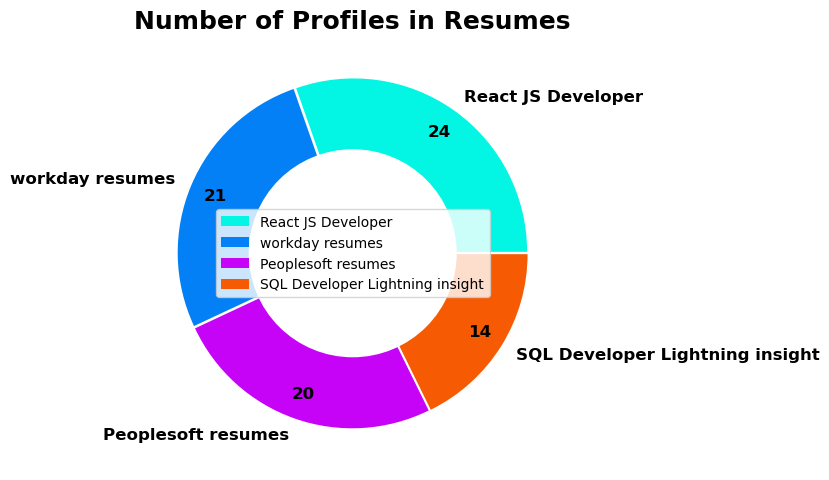

In [158]:
fig = plt.figure(figsize=(8,10))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Pai', dpi = 500)

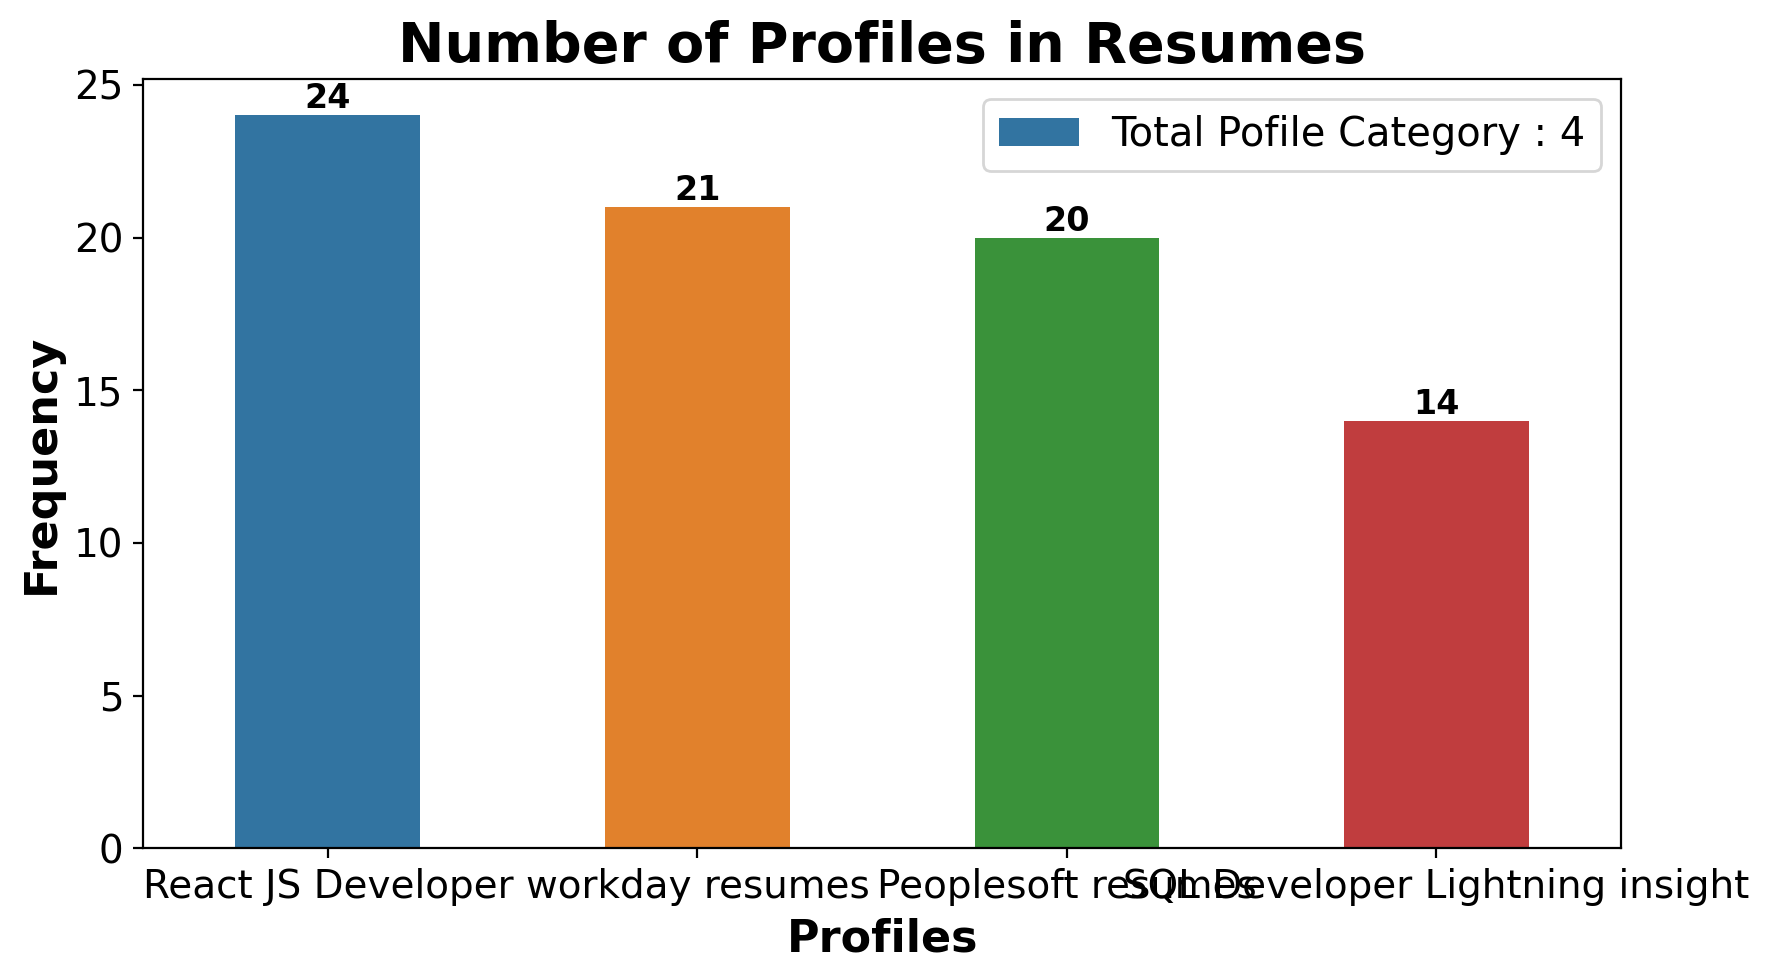

In [159]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Bar', dpi = 500)

# Percentage of Profiles Category

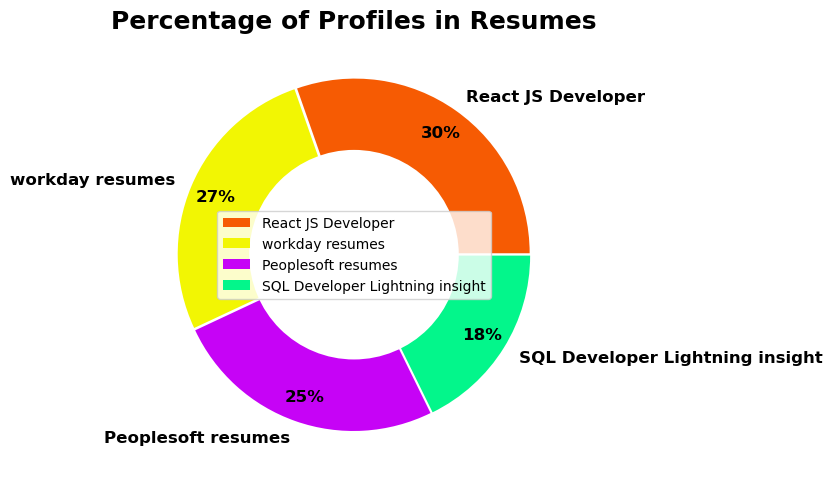

In [160]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Per_Cat_Pai', dpi = 500)

# Reading a Resume File

In [161]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [162]:
import docx2txt

def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx(r'Resumes\React JS Developer\React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

# N-grams
# N-grams analyses are often used to see which words often show up together

In [163]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [164]:
from textblob import TextBlob

TextBlob(resume_data['Resumes'][1]).ngrams(1)[:20]

[WordList(['Peoplesoft']),
 WordList(['Admin_G']),
 WordList(['Ananda']),
 WordList(['Rayudu.doc'])]

In [165]:
resume_data['Resumes']

0         Peoplesoft Admin_AnubhavSingh.docx
1       Peoplesoft Admin_G Ananda Rayudu.doc
2            Peoplesoft Admin_Gangareddy.doc
3               Peoplesoft Admin_Murali.docx
4     Peoplesoft Admin_Priyanka Ramadoss.doc
                       ...                  
74                Sri Krishna S_Hexaware.doc
75                    Srikanth-Hexaware.docx
76                     SSKumar_Hexaware.docx
77              Venkateswarlu B_Hexaware.doc
78                 Vinay Kumar_Hexaware.docx
Name: Resumes, Length: 79, dtype: object

In [166]:
# Top 20 most used words in Resumes
# Using CountVectorizer

countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resumes']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [167]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,52,docx
1,26,doc
2,19,peoplesoft
3,14,react
4,10,technologies
5,9,technologies docx
6,8,reactjs
7,3,react js
8,3,js
9,3,hexaware docx


# Visualizing the Result of Top 20 Nouns and Verbs most Frequently

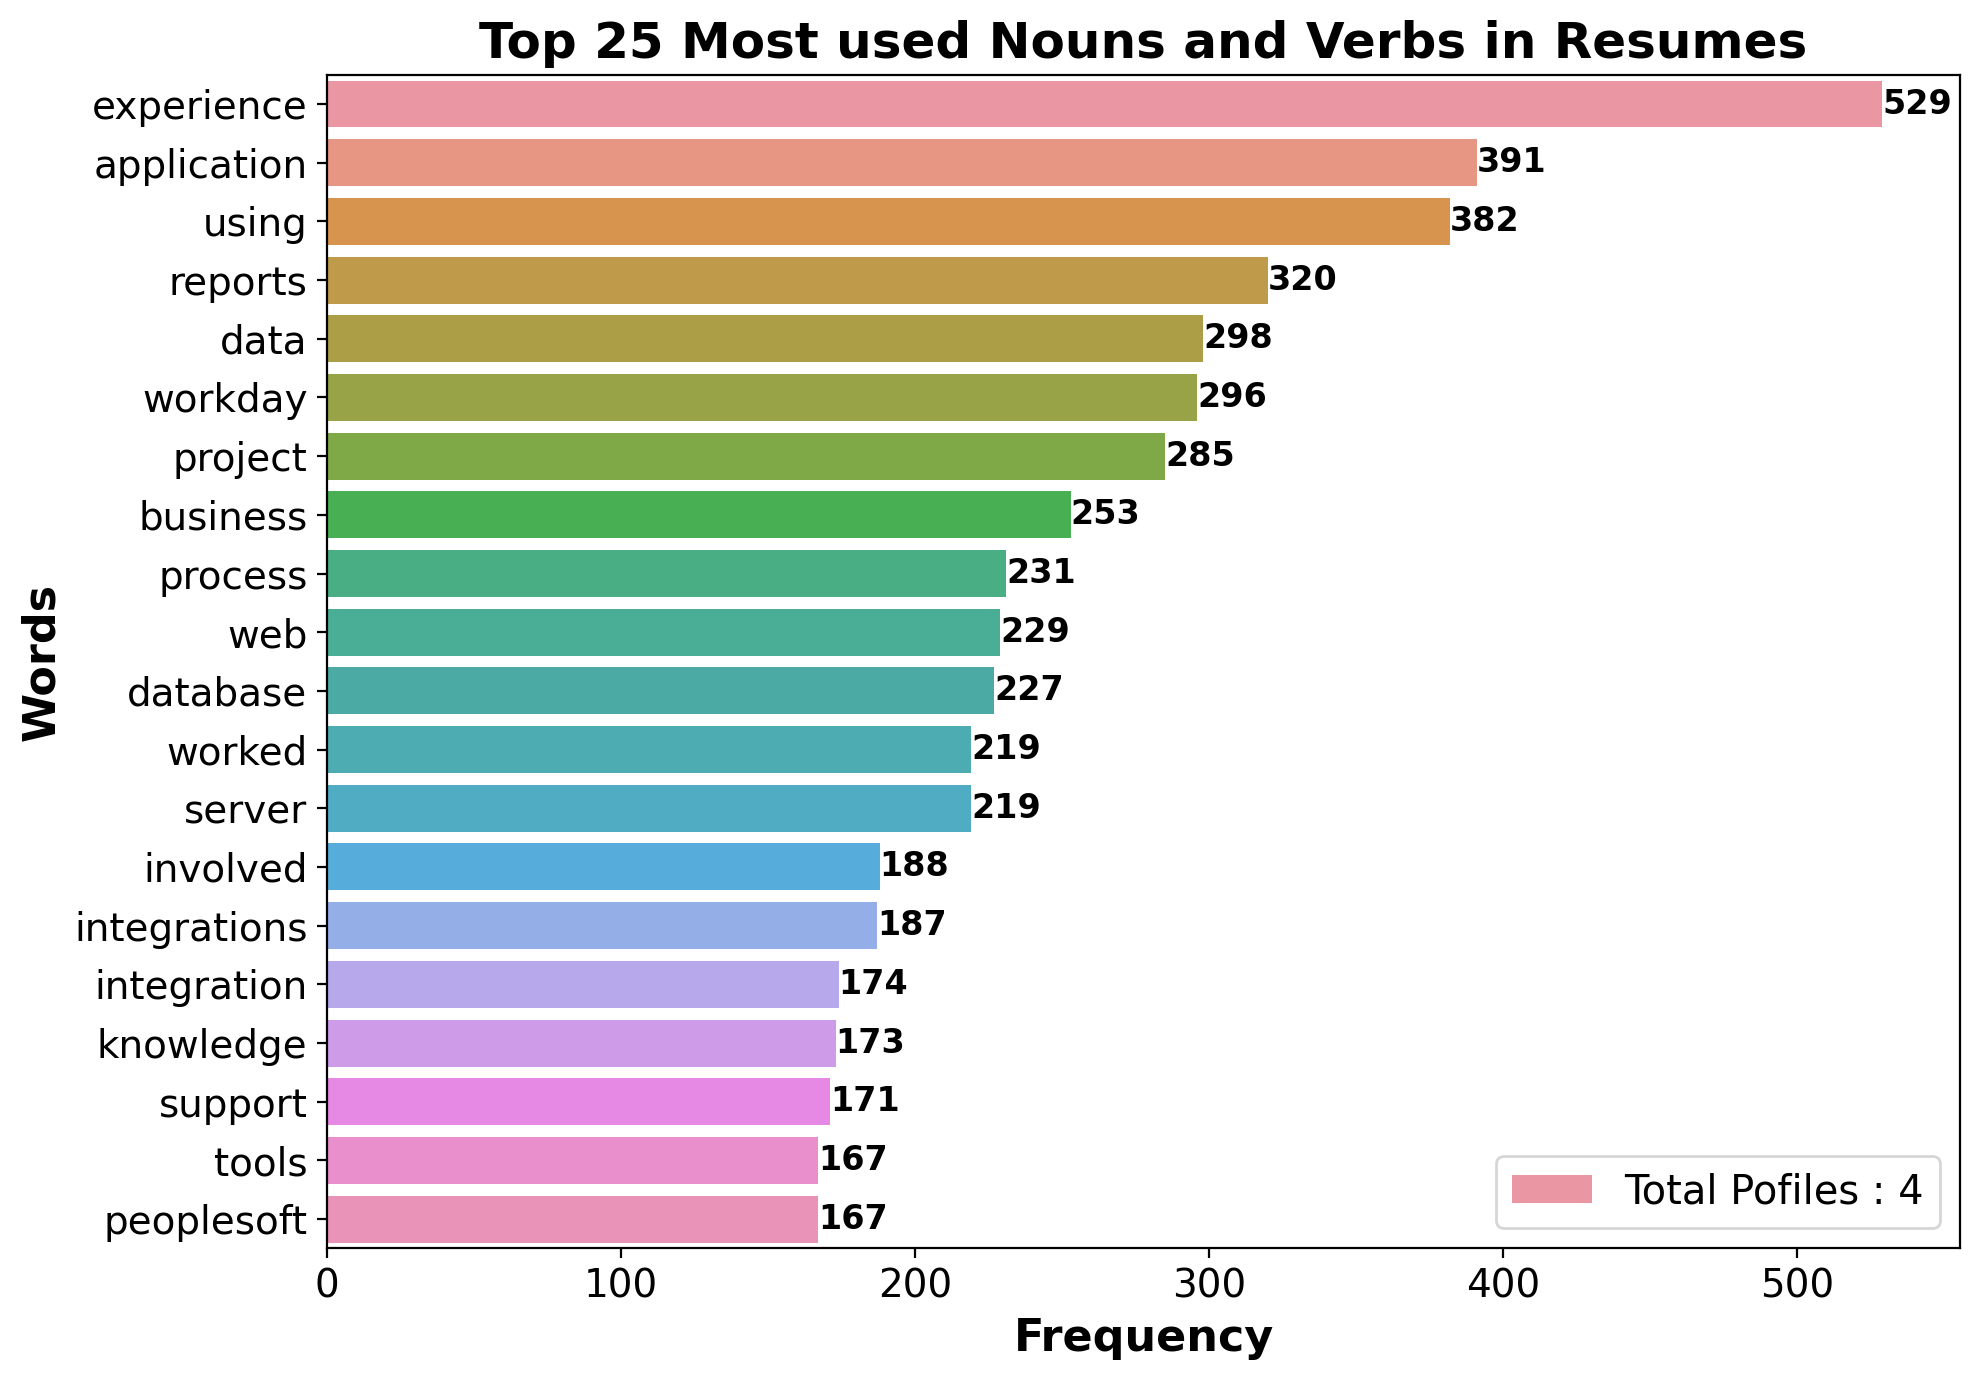

In [168]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofiles : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Nouns_Verbs_Bar', dpi = 500)

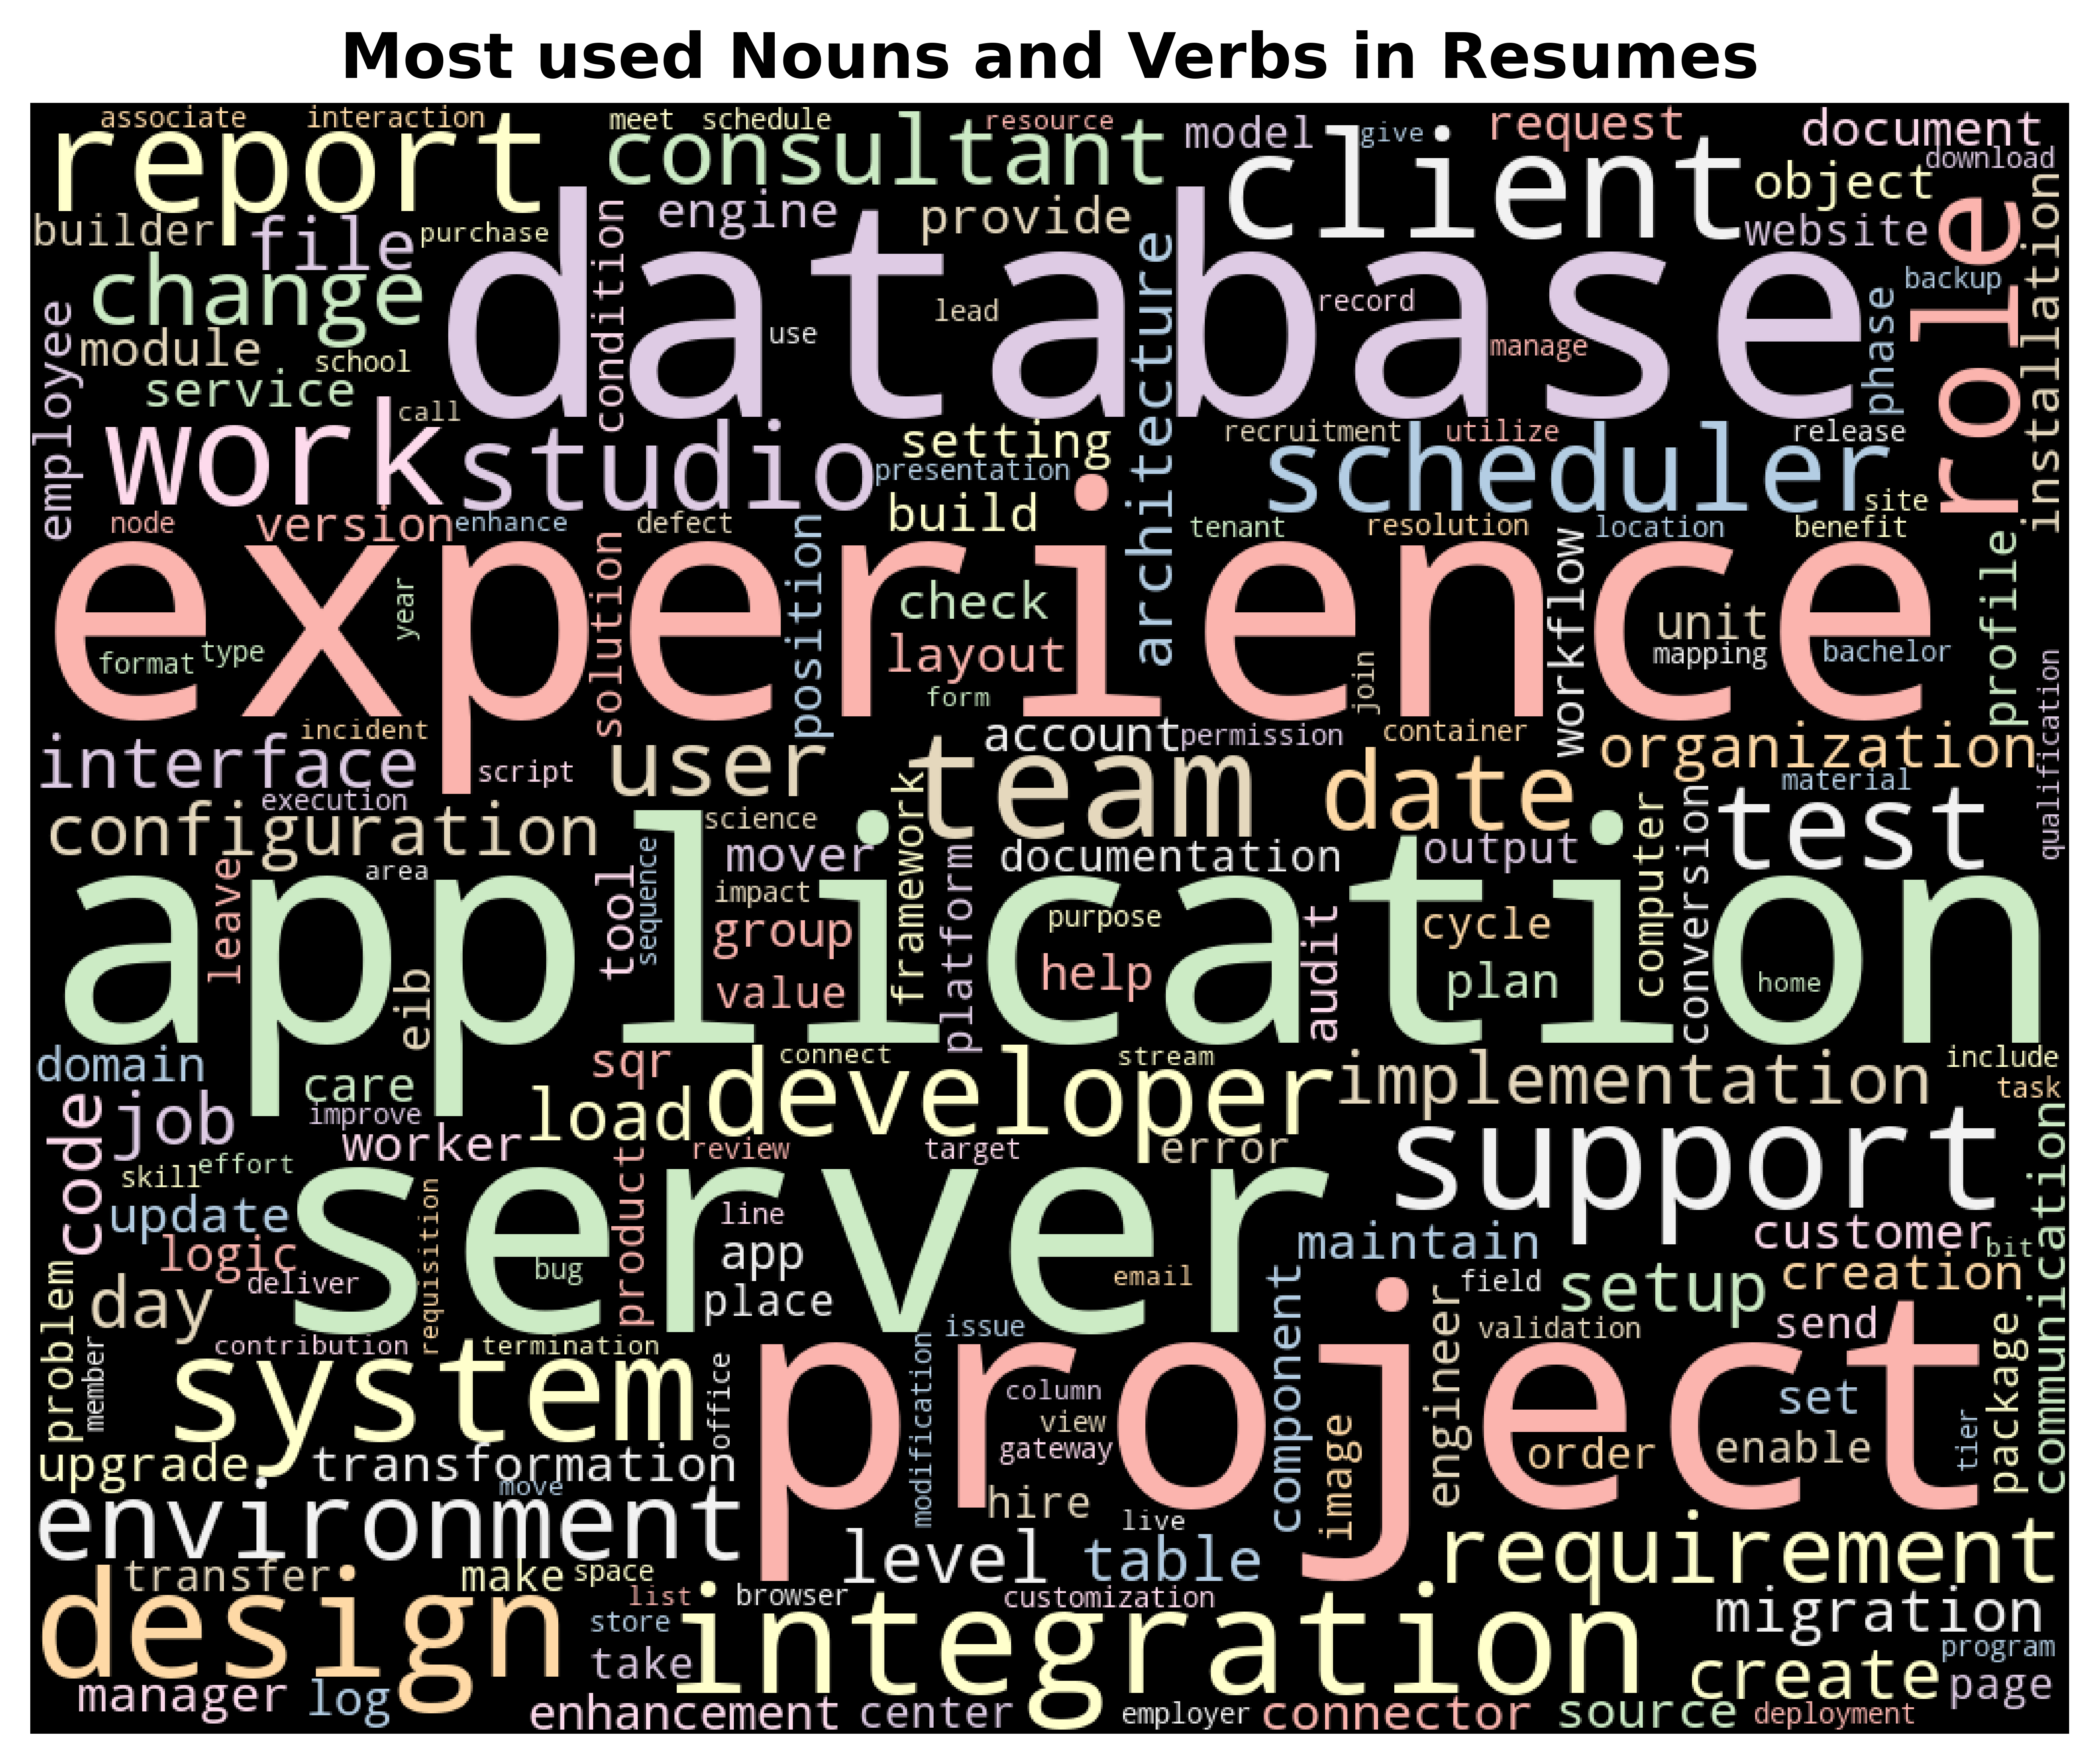

In [169]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()

# Model Building

# Import Dataset

In [170]:
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


# Data Preprocessing

## Label Encoder 

In [171]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Profile"])

resume_data

,Profile,Resumes,LebelEncoding
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx,0
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc,0
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc,0
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx,0
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc,0
...,...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc,3
75,workday resumes,Srikanth-Hexaware.docx,3
76,workday resumes,SSKumar_Hexaware.docx,3
77,workday resumes,Venkateswarlu B_Hexaware.doc,3


In [172]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [173]:
resume_data.isnull().sum()

Profile          0
Resumes          0
LebelEncoding    0
dtype: int64

### Train-Test Split

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score

In [175]:
x = resume_data['Resumes'].values
y = resume_data['Profile'].values

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

### TF-IDF Vectorization

In [177]:
#measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [178]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [179]:
x_train.shape, x_test.shape

((59, 110), (20, 110))

In [180]:
print(y_train),print(y_test)

['Peoplesoft resumes' 'React JS Developer' 'Peoplesoft resumes'
 'workday resumes' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'React JS Developer'
 'Peoplesoft resumes' 'React JS Developer' 'Peoplesoft resumes'
 'React JS Developer' 'SQL Developer Lightning insight'
 'React JS Developer' 'React JS Developer' 'workday resumes'
 'React JS Developer' 'SQL Developer Lightning insight'
 'React JS Developer' 'Peoplesoft resumes' 'React JS Developer'
 'React JS Developer' 'workday resumes' 'Peoplesoft resumes'
 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'workday resumes' 'workday resumes'
 'workday resumes' 'React JS Developer' 'workday resumes'
 'React JS Developer' 'SQL Developer Lightning insight' 'workday resumes'
 'React JS Developer' 'workday resumes' 'SQL Developer Lightning insight'
 'workday resumes' 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'workday resumes'
 'SQL Deve

(None, None)

# Classification Models

### KNN Classifier

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [182]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.54
Accuracy of  test set    : 0.55
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.62      1.00      0.77         5
             React JS Developer       0.50      1.00      0.67         6
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.00      0.00      0.00         5

                       accuracy                           0.55        20
                      macro avg       0.28      0.50      0.36        20
                   weighted avg       0.31      0.55      0.39        20




### Decision Tree Classifier

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.56      1.00      0.71         5

                       accuracy                           0.80        20
                      macro avg       0.64      0.75      0.68        20
                   weighted avg       0.69      0.80      0.73        20




### Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       0.50      0.75      0.60         4
                workday resumes       0.67      0.40      0.50         5

                       accuracy                           0.80        20
                      macro avg       0.79      0.79      0.78        20
                   weighted avg       0.82      0.80      0.80        20




### Support Vectore Machine (SVM) Classifier

In [187]:
from sklearn.svm import SVC

In [188]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.65
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       0.55      1.00      0.71         6
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.50      0.40      0.44         5

                       accuracy                           0.65        20
                      macro avg       0.51      0.60      0.54        20
                   weighted avg       0.54      0.65      0.57        20




### Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.70
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       0.55      1.00      0.71         6
SQL Developer Lightning insight       1.00      0.25      0.40         4
                workday resumes       0.67      0.40      0.50         5

                       accuracy                           0.70        20
                      macro avg       0.80      0.66      0.65        20
                   weighted avg       0.78      0.70      0.67        20




### AdaBoost Classifier

In [191]:
from sklearn.ensemble import AdaBoostClassifier

In [192]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.56
Accuracy of  test set    : 0.55
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       0.40      1.00      0.57         6
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.00      0.00      0.00         5

                       accuracy                           0.55        20
                      macro avg       0.35      0.50      0.39        20
                   weighted avg       0.37      0.55      0.42        20




### Gradient Boosting Classifie

In [193]:
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      0.25      0.40         4
                workday resumes       0.62      1.00      0.77         5

                       accuracy                           0.85        20
                      macro avg       0.91      0.81      0.79        20
                   weighted avg       0.91      0.85      0.82        20




###  Naive Bayes Classifier

In [195]:
from sklearn.naive_bayes import MultinomialNB

In [196]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.70
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
             React JS Developer       0.55      1.00      0.71         6
SQL Developer Lightning insight       1.00      0.25      0.40         4
                workday resumes       0.67      0.40      0.50         5

                       accuracy                           0.70        20
                      macro avg       0.80      0.66      0.65        20
                   weighted avg       0.78      0.70      0.67        20




# Model Evaluation

In [197]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.542373,0.55,0.28,0.50,0.36
1,DecisionTree Classifier,1.000000,0.80,0.64,0.75,0.68
2,RandomForest Classifier,1.000000,0.80,0.79,0.79,0.78
3,SVM Classifier,1.000000,0.65,0.51,0.60,0.54
4,Logistic Regression,1.000000,0.70,0.80,0.66,0.65
5,AdaBoost Classifier,0.559322,0.55,0.35,0.50,0.39
6,Gradient Boosting Classifier,1.000000,0.85,0.91,0.81,0.79
7,Naive Bayes Classifier,1.000000,0.70,0.80,0.66,0.65


In [198]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

### Train and Test Accuracy Plot

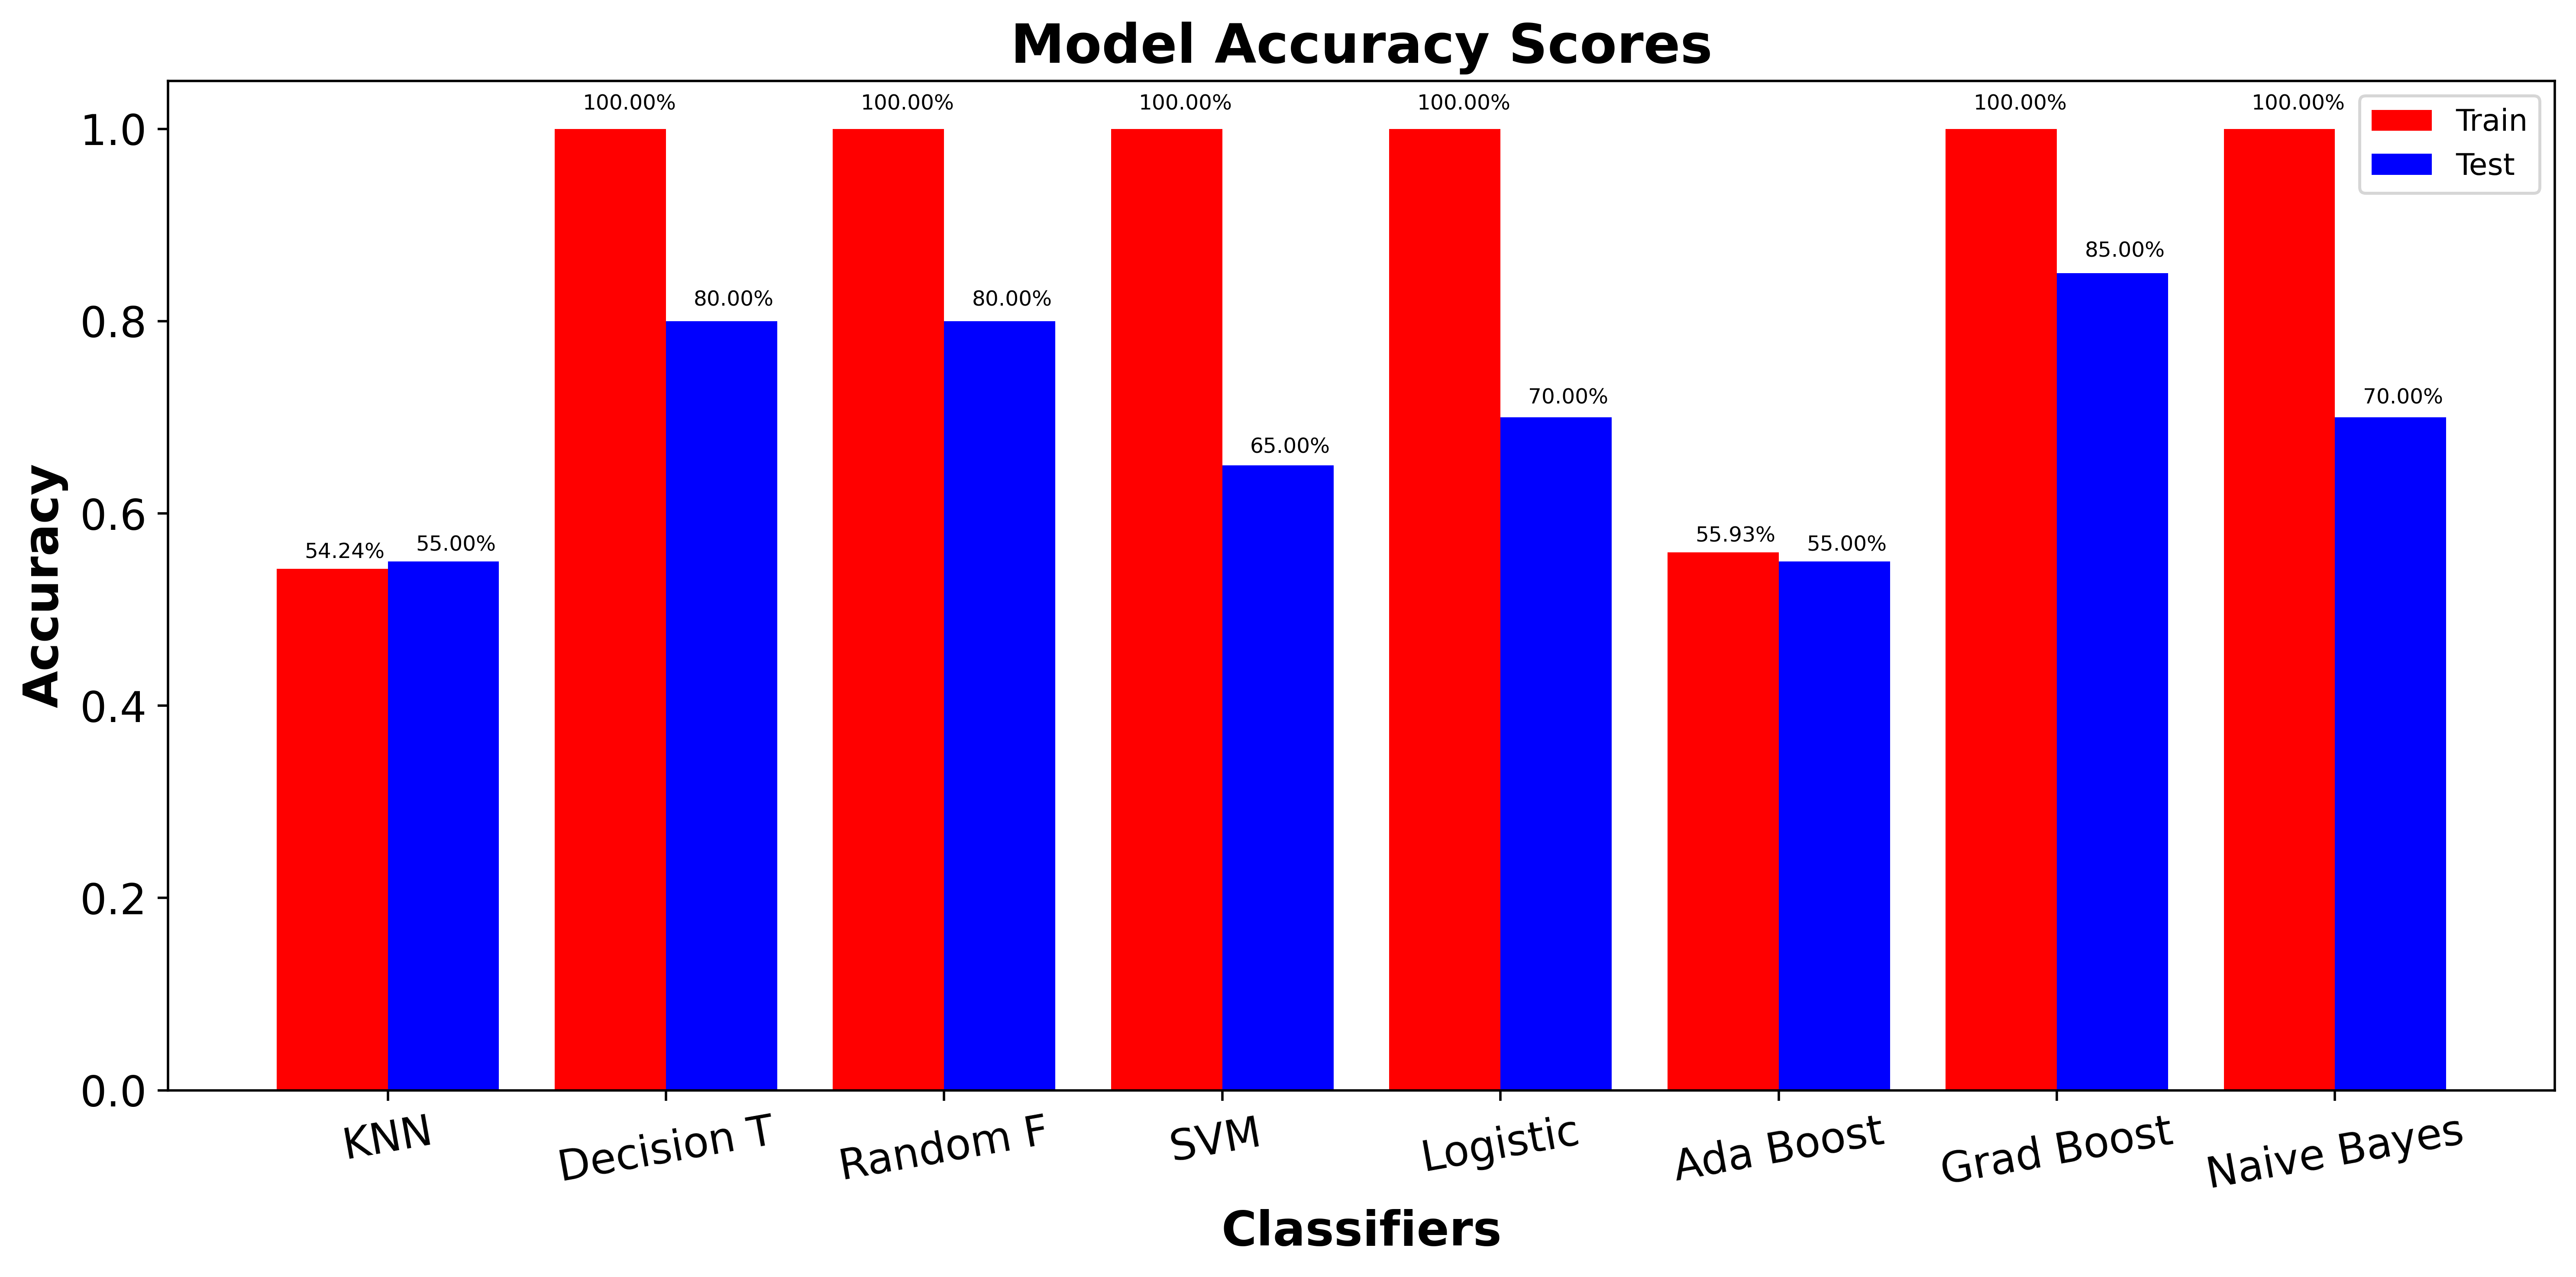

In [199]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "red")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

# Model Deployment

### Pickle File

In [202]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [203]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))